In [3]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps #bibliothèque proposant densités, fonctions  de répartition, quantiles, etc... de lois usuelles.


Dans ce document, on commence par donner quelques exemples d'applications du cours. On se servira des trois librairies ci-dessus. On peut déjà commencer par initialiser le générateur de nombres aléatoires :

In [9]:
np.random.seed(1234)
print(np.random.rand(5))

[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581]


# Préambule : Loi uniforme

Génerons un échantillon de 50 nombres uniformes sur $]0,1[$, calculons sa moyenne, sa variance et représentons son histogramme et la densité cible :

0.6136989175703284
0.07073709179434487


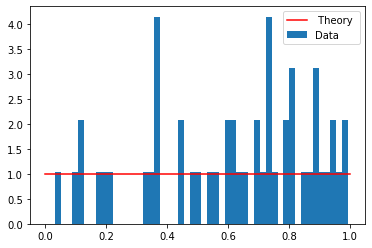

In [13]:
u = np.random.rand(50)
print(np.mean(u))
print(np.var(u))
x = np. linspace (0,1,100)
f_x = sps.uniform.pdf(x) #Densite uniforme
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(u,bins = 50,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

On augmente la taille de l'échantillon :

0.48658651544395215
0.08906363766041067


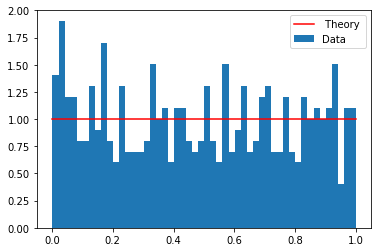

In [14]:
u = np.random.rand(500)
print(np.mean(u))
print(np.var(u))
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(u,bins = 50,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

On voit que l'estimation des moments se fait plus précise à mesure que la taille de l'échantillon augmente. L'histogramme se rapproche également de la densité cible.

0.49290294592068706
0.08523154876608367


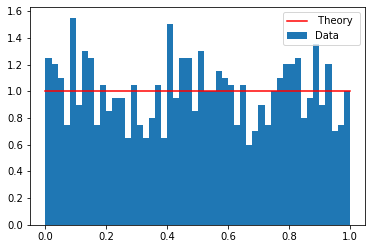

In [15]:
u = np.random.rand(1000)
print(np.mean(u))
print(np.var(u))
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(u,bins = 50,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

# Méthode d'inversion

## Loi exponentielle

On va transformer cet échantillon pour produire des réalisations de la loi exponentielle de paramètre $\lambda$ par la méthode d'inversion. Soit $X$ une variable aléatoire de loi exponentielle de paramètre $\lambda$. Sa fonction de répartition est donnée par :
$$F_X(x) = 1 - \exp(-\lambda x),~~x\in \mathbb{R}_+$$
Pour calculer son inverse, on résoud $u =  1 - \exp(-\lambda x)$. On trouve ainsi
$$x = -\frac{1}{\lambda}\log(1-u)$$
que l'on peut simplifier en
$$x = -\frac{1}{\lambda}\log(u)$$
puisque si $U\sim \mathcal{U}_{]0,1[}$, alors $1-U \sim \mathcal{U}_{]0,1[}$.

Pour générer un échantillon de réalisations de la loi exponentielle de paramètre $\lambda$, on applique donc cette transformation à un échantillon de réalisations de la loi uniforme sur $]0,1[$.

In [17]:
param = 1
y = -1/param * np.log(np.random.rand(1000))
y

array([1.19279264e+00, 8.92156884e-02, 8.18811848e-01, 3.76913755e-01,
       9.39671457e-01, 2.64435827e-01, 1.54661407e+00, 3.75150879e-01,
       3.86802951e-01, 1.33068669e-01, 5.98346239e-01, 2.09188666e+00,
       1.05997524e+00, 9.53645421e-01, 2.78105061e+00, 2.01245196e-01,
       1.90065791e-02, 1.04327055e+00, 2.51760051e+00, 2.15972839e-01,
       1.86494830e+00, 9.67578140e-01, 1.74824460e-02, 1.30722145e+00,
       1.48424258e+00, 4.33850451e-01, 6.09568895e-01, 7.68337636e-01,
       2.48283858e-01, 4.43324392e-01, 1.03427582e+00, 9.64691035e-01,
       1.64419895e+00, 1.08798689e+00, 4.66542041e-01, 6.20982724e-01,
       8.30507688e-02, 3.42139639e-01, 6.23193363e-01, 4.41189307e-01,
       9.55250167e-01, 1.98859445e+00, 4.70602099e-02, 1.28188209e+00,
       3.16798284e-01, 2.36082523e+00, 1.46849773e+00, 1.06355852e-01,
       3.62775777e-01, 6.84074214e-01, 1.75709667e+00, 2.03214892e-01,
       6.18119118e-01, 6.66893547e-01, 5.32328761e-01, 9.15452028e-01,
      

De même, on peut réprésenter son histogramme et y superposer la densité exponentielle

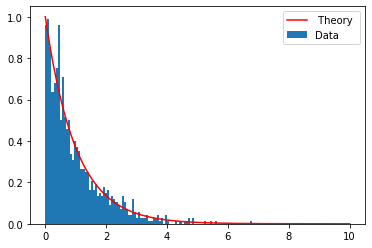

In [18]:
x = np. linspace (0,10,1000)
f_x = sps.expon.pdf(x) #Densite exponentielle
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(y,bins = 100,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

En pratique, on utilisera plutôt les fonctions internes de numpy pour simuler des réalisations selon les lois usuelles. Voir :

https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html

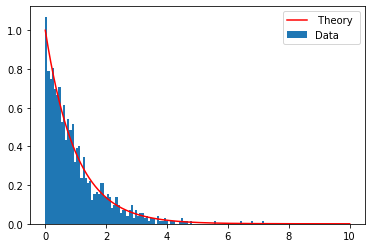

In [19]:
x = np. linspace (0,10,1000)
f_x = sps.expon.pdf(x) #Densite exponentielle
y = np.random.exponential(param,1000)
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(y,bins = 100,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

## Loi uniforme dans un domaine 
### Domaine A

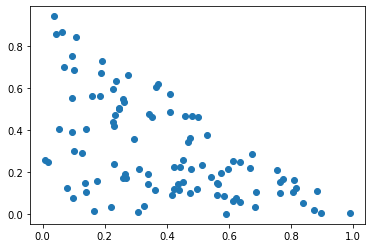

In [21]:
n=100

def rtri(n):
    x= np.empty([n,2])
    i=0
    while i < n :
	    u1 = np.random.rand(1)
	    u2 = np.random.rand(1)
	    if u2 < 1-u1 :
		    x[i,0] = u1
		    x[i,1] = u2
		    i=i+1
	
    return x	

tri = rtri(n)

plt.scatter(tri[:,0],tri[:,1],)
plt.show()

### Domaine B

In [ ]:
n=100
def rB(n):
    x=np.empty([n,2])
    i=0
    while i < n :
	    u1 = ####
	    u2 = ####
	    if ##### :
		    x[i,0] = u1
		    x[i,1] = u2
		    i=i+1
	
    return x	

B = rB(n)

plt.scatter(B[:,0],B[:,1],)
plt.show()

### domaine C

In [ ]:
n=100
def rC(n):
    x=np.empty([n,2])
    i=0
    while i < n :
	    u1 = ####
	    u2 = ####
	    if ##### :
		    x[i,0] = u1
		    x[i,1] = u2
		    i=i+1
	
    return x	

C = rC(n)

plt.scatter(C[:,0],C[:,1],)
plt.show()

## Simulation selon la loi géométrique
### Question 2

In [ ]:
n=1000
p=0.6
q=0.4
def rgeom(n,p):
    x=np.empty(n)
    for i in range(n) :
	    ok= False
	    k=0
	    while not ok :
		    ok= ####
		    k= ####
	
	    x[i]=k

    return x

y = rgeom(n,p)

# Empirical (experimental) mean
np.mean(y)
# Expectation (theoretical mean)
1/p
# or equivalently
1/(1-q)
	
# Empirical variance
np.var(y)
# Theoretical variance
(1-p)/p**2
# or equivalently
q/(1-q)**2

# histogram
d = np.diff(np.unique(y)).min()
left_of_first_bin = y.min() - float(d)/2
right_of_last_bin = y.max() + float(d)/2
plt.hist(y, np.arange(left_of_first_bin, right_of_last_bin + d, d),density = True)
plt.show()


### Question 4

In [ ]:
n = 1000
lambd = ##### 
y = ##### 
# Empirical (experimental) mean
np.mean(y)
# Expectation (theoretical mean)
1/p
# or equivalently
1/(1-q)
	
# Empirical variance
np.var(y)
# Theoretical variance
(1-p)/p**2
# or equivalently
q/(1-q)**2

# histogram
d = np.diff(np.unique(y)).min()
left_of_first_bin = y.min() - float(d)/2
right_of_last_bin = y.max() + float(d)/2
plt.hist(y, np.arange(left_of_first_bin, right_of_last_bin + d, d),density = True)
plt.show()

## Simulation de la loi gaussienne par la méthode du rejet
### Question 4
On rappelle qu'une variable de loi de Laplace peut s'obtenir à partir d'une variable uniforme sur ]0,1[ de la manière suivante : 
$X = \text{sgn}(U - 1/2)\ln(1-2|U-1/2|)$

In [ ]:
# function simulating n symmetric
# exponential variables (Laplace distribution)
# with parameter 1

def rlaplace(n):
    u = np.random.rand(n)
    x = ###
    return x 

# function simulating n Gaussian random variables
# with mean 0 and variance 1 by rejection algorithm

def rgaussian(n):
    C= ########
    x=np.empty(n)

    for i in range(n) :
	    y= #####
	    u= ######
	    a= ######

	    while a>sps.norm.pdf(y) :
		    y= ####
		    u= ####
		    a= ####
	
	    x[i]=y

    return x

# Test of the function
n=1000

y=rgaussian(n)
x = np. linspace (-5,5,n)
plt.plot(x,sps.norm.pdf(x),"r",label =" Theory ")
plt.hist(y,50,density=True, label = "Data")
plt.legend(loc="best")
plt.show()


## Simulation de la loi de Wigner

La loi de Wigner (ou du demi-cercle) est la loi de support $[-2, 2]$ et de densité $f(x) = \frac{1}{2\pi}\sqrt{4 - x^2}$.
Pour simuler selon une densité $f$ à support compact $C$, le plus simple est d'utiliser une loi uniforme sur ce même compact comme densité instrumentale et de prendre $\sup_{x\in C}f(x)$ comme constante pour la majoration (en ignorant la constante de normalisation de l'uniforme 1/|C|).
Ici cette constante vaut $1/\pi$.

In [ ]:
n = 1000 #taille de l'échantillon

# densité de Wigner
def dwigner(x):
    return #####



Représentation graphique

In [ ]:
x = np. linspace (-2,2,1000)
f_x = dwigner(x)
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(y,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

## Loi des grands nombres et théorème central limite
### Question 1

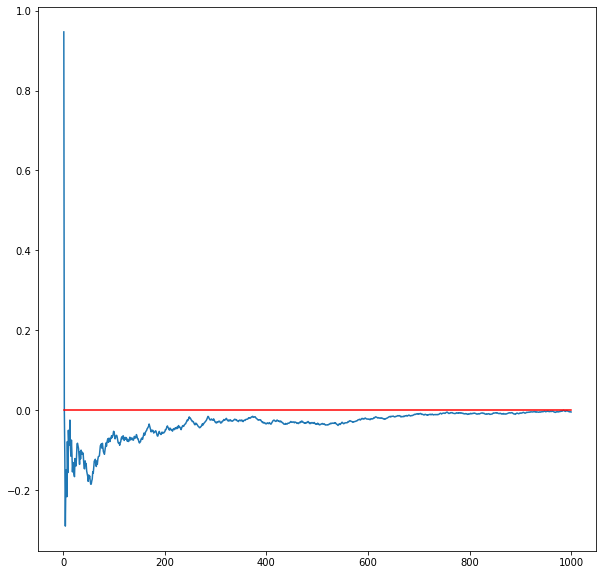

In [55]:
n = 1000
x = 1 + np.arange(n)
u = np.random.uniform(-1, 1, n)
Sn = np.cumsum(u)/x
plt.figure(figsize = (10,10))
plt.plot(x,Sn)
plt.plot(x, [0 for i in range(n)], 'r')
plt.show()

### Question 2

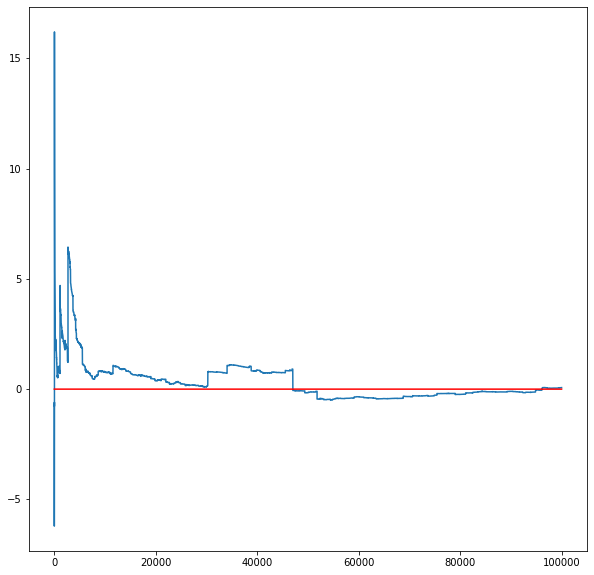

In [54]:
n = 100000
x = 1 + np.arange(n)
u = np.random.standard_cauchy(n)
Sn = np.cumsum(u)/x
plt.figure(figsize = (10,10))
plt.plot(x,Sn)
plt.plot(x, [0 for i in range(n)], 'r')
plt.show()

### Question 3
On a $\mu = 0$ et $\sigma = \sqrt{\mathbb{E}(X^2)} =\frac{1}{\sqrt{3}}$

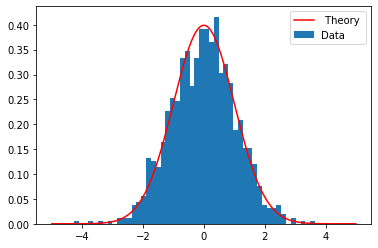

In [57]:
n = 1000
m = 1000
sigma = 1/np.sqrt(3)
y = np.zeros(m)
for i in range(m) : 
    y[i] = np.sqrt(n)*np.mean(np.random.uniform(-1,1,n))/sigma

x = np. linspace (-5,5,n)
plt.plot(x,sps.norm.pdf(x),"r",label =" Theory ")
plt.hist(y,50,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

## Simulation d'un mélange de gaussienne
### Question 1

On illustre ici l'application de la méthode d'inversion pour la simulation d'une loi discrète. Soit $X$ une v.a.r. de loi :
$$\mathbb{P}(X=x) = \left\{\begin{array}{ll} 1/2 & \text{ si }x = 1 \\ 1/4 & \text{ si }x = 2 \\ 1/4 & \text{ si }x = 3 \\ 0 & \text{ sinon} \end{array} \right.$$
On commence par calculer les valeurs non triviales prises par sa fonction de répartition, puis on transforme les variables uniformes comme suit :

In [ ]:
n=1000
p = ####
u = ######
print(p)
y = ##### 
d = np.diff(np.unique(y)).min()
left_of_first_bin = y.min() - float(d)/2
right_of_last_bin = y.max() + float(d)/2
plt.hist(y, np.arange(left_of_first_bin, right_of_last_bin + d, d),density = True)
plt.show()

### Question 2
On peut alors s'en servir pour simuler, par exemple, selon un mélange des gaussiennes : $\mathcal{N}(0,1)$, $\mathcal{N}(5,1/2)$ et $\mathcal{N}(8,4)$, chacune associée à une des modalités de $K$.

In [ ]:
z = ##### 
x = np. linspace (-5,15,n)
f_x = ##### #Densite du melange
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(z,bins = 100,density=True, label = "Data")
plt.legend(loc="best")
plt.show()

# Echantillonnage d'importance

On cherche à évaluer l'espérance d'une variable aléatoire $X$ gaussienne centrée réduite (de densité $f_X$ et de f.d.r. $F_X$) sachant qu'elle dépasse la valeur 3. La densité conditionnelle s'écrit :

$$f_{X|X > 3}(x) = \frac{f_x(x)}{1-F_X(3)}1_{]3,+\infty[}(x)$$

et on veut estimer :

$$\mathbb{E}(X|X>3) = \int_{\mathbb{R}} x f_{X|X > 3}(x) dx$$

### Question 1

Si on implémente une méthode de rejet de manière naïve --- on tire des gaussiennes centrées réduites et on ne conserve que celles effectivement supérieures à 3 pour calculer l'espérance --- les estimations varient fortement d'un tirage à l'autre (on a même parfois des `nan`, lorsque l'échantillon ne contient aucune valeur supérieure à 3)  et le taux de rejet vaut :

In [ ]:
n = 1000
X = ##### 
Econd = #####
print(Econd)
#####

C'est donc peu efficace. 

### Question 3

On va donc tirer selon une loi instrumentale qui va mieux cibler la région d'intérêt, par exemple une gaussienne d'espérance 3 et de variance 1 (de densité notée $g$) et on utilisera alors l'estimateur :

$$\frac{\sum_{i=1}^{n}w_ih(X_i)}{\sum_{i=1}^n w_i}$$

avec les poids d'importance $w_i = \frac{f_{X|X > 3}(X_i)}{g(X_i)}$.

In [ ]:
def dnormcond(x,s): ### densité conditionnelle
    
    return 

n = 1000

y = #####

w = #####

print(####)

m = #####

m


On peut représenter l'histogramme de l'échantillon pondéré (le poids $w_i$ est affecté à chaque simulation dans le calcul de l'histogramme) et le comparer à $f_{X|X > 3}(x)$

In [ ]:
x = np.linspace(3,6,1000)
f_x = dnormcond(x,3)
plt.plot(x,f_x ,"r",label =" Theory ")
plt.hist(y,density=True, bins = 100, weights=w, label = "Data")
plt.legend(loc="best")
plt.show()

### Calcul numérique d'une probabilité
La variable $1_{\sin(X)>1/2}$ où $X \sim \mathcal{N}(0,1)$ est bien $\mathcal{L}^1$ car bornée par 1 et donc la loi forte des grands nombres s'applique.

In [ ]:
n=100000
np.mean(np.sin(np.random.standard_normal(n))>1/2)

Visualisation de la convergence

In [ ]:
n=1000
x = np.arange(n)
Mn = np.cumsum(np.sin(np.random.standard_normal(n))>1/2)/(1+x)
plt.plot(x,Mn)
plt.show()